#### Regression Boston housing price KNN DT SVR

In [1]:
# Import pandas library
import pandas as pd
# Read csv data file
bos = pd.read_csv('Data/boston.csv')

In [2]:
# Find out the number of instances and number of attributes
bos.shape

(506, 14)

In [3]:
# View the first 5 rows
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Data Set Characteristics:**

    :Number of Instances: 506 
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
    
    :Attribute Information (in order):    
    - CRIM     per capita crime rate by town    
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.   
    - INDUS    proportion of non-retail business acres per town    
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)    
    - NOX      nitric oxides concentration (parts per 10 million)    
    - RM       average number of rooms per dwelling    
    - AGE      proportion of owner-occupied units built prior to 1940    
    - DIS      weighted distances to five Boston employment centres    
    - RAD      index of accessibility to radial highways    
    - TAX      full-value property-tax rate per $10,000    
    - PTRATIO  pupil-teacher ratio by town    
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town    
    - LSTAT    % lower status of the population    
    - MEDV     Median value of owner-occupied homes in $1000's
    :Missing Attribute Values: None:Creator: Harrison, D. and Rubinfeld, D.

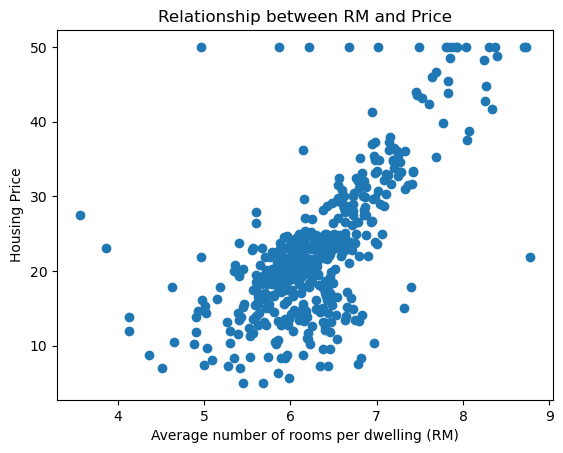

In [4]:
# Import matplotlib library
import matplotlib.pyplot as plt
# Plot RM against PRICE
plt.scatter(bos.RM, bos.MEDV)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

In [5]:
# Indicate the target column
target = bos['MEDV']
# Indicate the columns that will serve as features
features = bos.drop('MEDV', axis = 1)
# Split data into train and test sets# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target,                                                   
                                                    test_size = 0.2, 
                                                    random_state = 0)

#### Linear Regression

We will fit a linear regression model to predict the Boston housing prices. 

LinearRegression, in its simplest form, fits a linear modelto the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small aspossible.

y = βx + c
x : predictor variable(s)y : target variable
β : coefficientsc : intercept

For more information about the parameters we can tune for linear regression, check out: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. If we want to tune the hyperparameters of themodel, we can run k-fold cross validation or split x_train further into a training set and validation set. For k-fold cross validation,make sure you set the scoring parameter to a regression performance metric: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter.In this lab, we will just fit the model using the default linear regression parameters and run the model on the test set.

In [6]:
# Import linear regression
from sklearn.linear_model import LinearRegression
# Create a linear regression model
lm = LinearRegression()
# Fits a linear model
lm.fit(x_train, y_train)
# To print the coefficients of the model
lm.coef_

array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
       -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
        2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
       -4.92792725e-01])

In [7]:
lm.intercept_

38.09169492630233

In [8]:
pd.DataFrame(zip(bos.columns, lm.coef_), columns = ['features', 'estimated_coefficients'])

,features,estimated_coefficients
0,CRIM,-0.119443
1,ZN,0.044780
2,INDUS,0.005485
3,CHAS,2.340804
4,NOX,-16.123604
5,RM,3.708709
6,AGE,-0.003121
7,DIS,-1.386397
8,RAD,0.244178
9,TAX,-0.010990


In [9]:
# Predict target using the linear model with estimated coefficients
test_predict = lm.predict(x_test)
# Print the first 5 predicted housing prices
test_predict[0:5]

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254])

We can map the predicted prices and actual prices from the test set in a scatter plot for comparison.

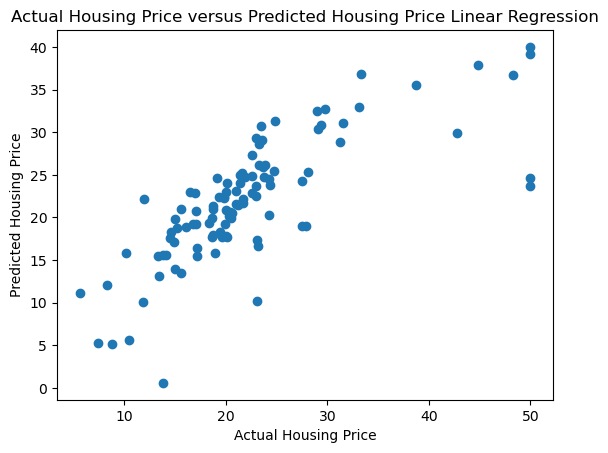

In [10]:
plt.scatter(y_test, test_predict)
plt.xlabel('Actual Housing Price')
plt.ylabel('Predicted Housing Price')
plt.title('Actual Housing Price versus Predicted Housing Price Linear Regression')
plt.show()

From the scatter plot, we can observe that the model tends to underpredict when the actual housing prices are on the lower andhigher ends.We can also generate regression performance metrics to make comparison between models easier.

In [11]:
# Returns R squared as a performance measure
lm.score(x_test, y_test)

0.5892223849182534

The score() function returns the coefficient of determination (R squared) of the prediction. R squared measures if the model is agood fit for the data. R squared is always going to be between -∞ and 1. The ideal value for R squared is 1. The closer the value ofR squared to 1, the better is the model fitted.

In [12]:
# Import scikit-learn metrics module for RMSE and MAE calculation
from sklearn import metrics
# Import the math module
import math
# Compute the MSE
print("MSE (Test): ", metrics.mean_squared_error(y_test, test_predict))
# Compute the RMSE
print("RMSE (Test): ", math.sqrt(metrics.mean_squared_error(y_test, test_predict)))

MSE (Test):  33.44897999767632
RMSE (Test):  5.783509315085117


In [13]:
# Compute the MAE
print("MAE (Test): ", metrics.mean_absolute_error(y_test, test_predict))

MAE (Test):  3.8429092204444997


From the performance metrics computed, we can conclude the linear model is a moderate fit for the data with R squared of 0.59.From the MAE = 3.84, we can conclude that the prediction made by the model is off by 3843 dollars (target is median value ofowner-occupied homes in 1000's dollars so we get 3843 dollars by multiplying the MAE by 1000) on average. MAE is lesssensitive to outliers but from the earlier plot of actual housing prices versus predicted housing prices, we can see that there areextreme cases of errors at the lower and higher ends. RMSE is more sensitive to large errors, so RMSE = 5.78 produces a highererror value (the housing prices prediction is off by 5784 dollars on average). To select the best regression model, we will relativelycompare R squared, RMSE and MAE between different models.

#### KNeighborsRegressor

In [14]:
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN Regressor model
model = KNeighborsRegressor(n_neighbors=3)
# Fit the model
model.fit(x_train, y_train)
# Predict on test data
y_pred = model.predict(x_test)
# To print the model details
print(model)

KNeighborsRegressor(n_neighbors=3)


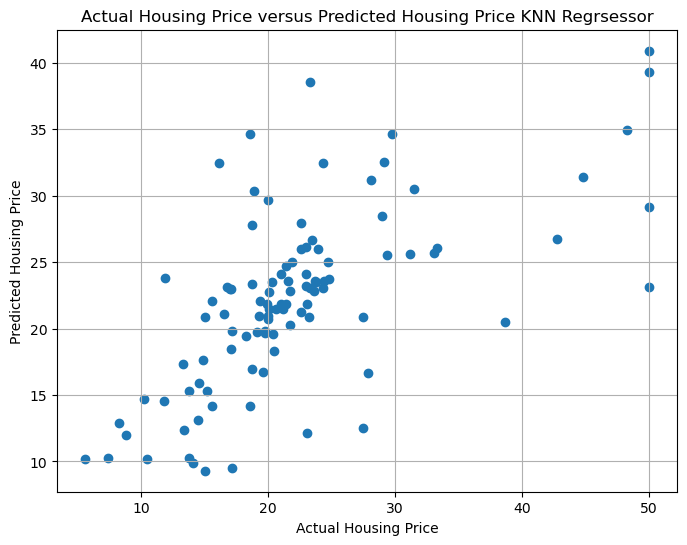

In [15]:
# 4. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Housing Price')
plt.ylabel('Predicted Housing Price')
plt.title('Actual Housing Price versus Predicted Housing Price KNN Regrsessor')
plt.grid(True)
plt.show()

In [16]:
# 3. Calculate Metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 4.723856209150326
RMSE: 6.971114538472075
